In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# from google.colab import files
# files.upload()

In [0]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')

In [142]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
trainingDataset = dataset.iloc[:,1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
trainingDataset = scaler.fit_transform(trainingDataset)

In [147]:
trainingDataset.shape

(1258, 1)

In [148]:
trainingDataset[0]

array([0.08581368])

In [149]:
len(trainingDataset)

1258

In [0]:
X_train = []
y_train = []

In [0]:
timestamp = 60
for i in range(timestamp,len(trainingDataset)):
  X_train.append(trainingDataset[i-timestamp:i,0])
  y_train.append(trainingDataset[i,0])

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [153]:
X_train.shape

(1198, 60)

In [154]:
y_train.shape

(1198,)

In [155]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [156]:
y_train[0]

0.08627874097775134

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)

In [158]:
X_train.shape

(1198, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [0]:
def model():
  model = Sequential()
  model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
  model.add(Dropout(0.2))
  
  model.add(LSTM(units=50,return_sequences=True))
  model.add(Dropout(0.2))
  
  model.add(LSTM(units=50,return_sequences=True))
  model.add(Dropout(0.2))
  
  model.add(LSTM(units=50,return_sequences=False))
  model.add(Dropout(0.2))
  
  model.add(Dense(units=1))
  
  model.compile(optimizer="adam",loss="mean_squared_error")
  
  return model

In [0]:
model = model()

In [0]:
from keras.utils import plot_model

In [0]:
modelImage = plot_model(model,to_file="model.jpg")

In [0]:
from keras.preprocessing.image import load_img

In [0]:
image = load_img('model.jpg')

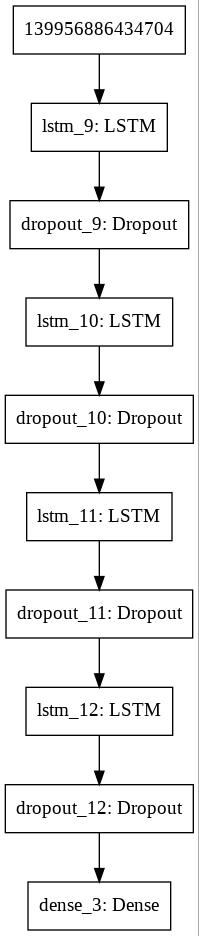

In [166]:
image

In [167]:
history =  model.fit(X_train,y_train,batch_size=30,epochs=100)

Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0487
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

In [0]:
# files.upload()

In [0]:
dataset1 = pd.read_csv('Google_Stock_Price_Test.csv')

In [170]:
dataset1

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [0]:
testingDataset = dataset1.iloc[:,1:2].values

In [172]:
testingDataset

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [0]:
# Preparing Data According To Model Input

In [0]:
totalDataset = pd.concat((dataset['Open'],dataset1['Open']),axis=0)

In [175]:
totalDataset.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [176]:
totalDataset.tail()

15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, dtype: float64

In [0]:
X_test = totalDataset[len(totalDataset)-len(dataset1)-60:].values

In [0]:
inputs = X_test.reshape(-1,1)

In [179]:
inputs.shape

(80, 1)

In [0]:
inputs = scaler.transform(inputs)

In [181]:
len(inputs)

80

In [182]:
X_test = []
for i in range(timestamp,len(inputs)):
  X_test.append(inputs[i-timestamp:i,0])
X_test = np.array(X_test)
X_test.shape

(20, 60)

In [0]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [184]:
X_test.shape

(20, 60, 1)

In [0]:
prediction = model.predict(X_test)

In [0]:
prediction = scaler.inverse_transform(prediction)

In [187]:
prediction

array([[781.7937 ],
       [779.1218 ],
       [780.1358 ],
       [781.7824 ],
       [785.0462 ],
       [790.8546 ],
       [795.6443 ],
       [796.904  ],
       [797.02216],
       [797.31647],
       [797.7359 ],
       [797.8276 ],
       [797.72394],
       [798.3055 ],
       [799.2021 ],
       [804.2173 ],
       [811.12244],
       [817.82733],
       [820.6059 ],
       [815.0647 ]], dtype=float32)

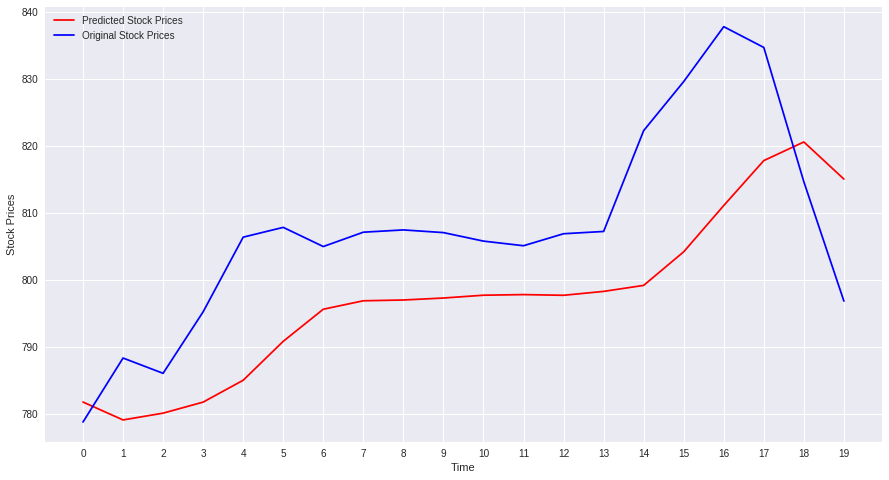

In [190]:
plt.figure(figsize=(15,8))
plt.plot(prediction,label="Predicted Stock Prices",color="red")
plt.plot(dataset1['Open'].values,label="Original Stock Prices",color="blue")
plt.xlabel("Time")
plt.ylabel("Stock Prices")
plt.xticks(np.arange(20))
plt.legend()
plt.show()

In [189]:
""

''